In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

import math
import numpy as np
import matplotlib.pyplot as plt

import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [2]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [3]:
label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [4]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Eğitim Seti Sayısı: {}".format(num_train_examples))
print("Test Seti Sayısı:     {}".format(num_test_examples))

Eğitim Seti Sayısı: 60000
Test Seti Sayısı:     10000


In [5]:
#normalleştirme fonksiyonu
def normalize(images,labels):
  images = tf.cast(images,tf.float32)
  images /= 255
  return images,labels

In [6]:
#veri setlerini normalleştirme
train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

In [7]:
#veri setini önbelleğe alma
train_dataset = train_dataset.cache()
test_dataset = test_dataset.cache()

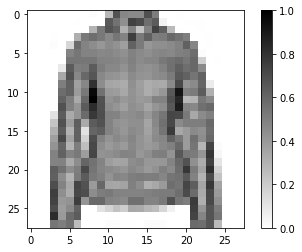

In [8]:
#örnek resim gösterimi
for image,label in test_dataset.take(1):
  break

image = image.numpy().reshape(28,28)

plt.figure()
plt.imshow(image, cmap = plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show();

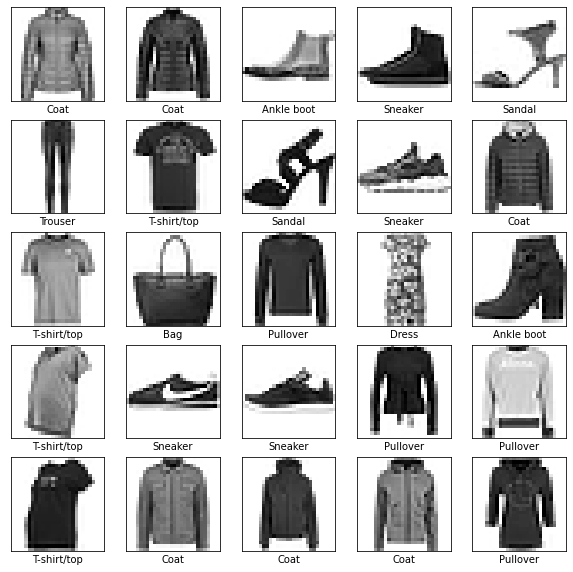

In [9]:
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(label_names[label])
    i += 1
plt.show()

In [10]:
model = tf.keras.Sequential([tf.keras.layers.Conv2D(32,(3,3), padding='same', activation = tf.nn.relu,
                             input_shape = (28,28,1)),
                             tf.keras.layers.MaxPooling2D((2,2),strides = 2),
                             tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
                             tf.keras.layers.MaxPooling2D((2, 2), strides=2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(128, activation=tf.nn.relu),
                             tf.keras.layers.Dense(10, activation=tf.nn.softmax)
                             ])

> İlk katman 2boyutlu bir evrişim katmanıdır. Padding'de doldurma yapılırken aynı olarak seçilmiş olması çıktı birim boyutunun giriş hacim boyutuyla eşleşebileceği şekilde birimin uzamsal boyutlarını korumaya yarar. İlk katman orjinal görüntü boyutunu korur, 3x3 kernele sahiptir. İlk baştaki 32 ise 32 evrişimli çıktı olacağını belirtir. Evrişim katmanı 3x3 kerneli piksel ortaya gelecek şekilde alıp daha sonra her eşleşeni çarparak ortalanan piksel değere çarpılan değerlerin toplamını atama işlemini yapar. Bunu yaparken doldurma işlemi aynı olacak (değerler) şekilde yapılır.

> Bir sonraki katman 2x2 boyutunda maxpooling yani en büyük pikseli seçerek görüntüyü küçültme işlemi yapan katmandır. Adımı 2 'dir yani her seferde 2x2 matris 2 birim sağa giderek işlem yapar. 

> Bir sonraki katman tekrardan 2boyutlu bir evrişim katmanıdır. Bu katman 64 adet evrişimli çıktı oluşturur.

> Bir sonraki katman maxpooling katmanıdır, bir önceki katmandan gelen 64 sonucu (resmi) 2x2 matris şeklinde giderek en büyük pikseli seçip resmin boyutunu yarıya düşürür.

> Bir sonraki katman sadece gelen verileri düzleştirmek için kullanılır.

> Bir sonraki katman 128 nörona sahip aktivasyon fonksiyonu relu olan bir katmandır.

> Son katman çıkış katmanıdır. Aktivasyon fonksiyonu softmax'dir. 10 adet toplamları 1 olan değer üretir, bu değerler resmin hangi sınıfa ait olacağının oranlarıdır.

In [11]:
#model derlemesi
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [12]:
#model parametreleri
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [13]:
#model eğitimi
model.fit(train_dataset, epochs=10, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/10
1875/1875 [==============================] - 22s 4ms/step - loss: 0.3976 - accuracy: 0.8573
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2630 - accuracy: 0.9046
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2174 - accuracy: 0.9205
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1835 - accuracy: 0.9312
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1572 - accuracy: 0.9413
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1328 - accuracy: 0.9511
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1126 - accuracy: 0.9589
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0945 - accuracy: 0.9643
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0792 - accuracy: 0.9711
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.06

> Model eğitim veri setini %97.5 oranında doğru tahmin etmektedir, modelin ezber yapıp yapmadığını test veri seti üzerinde doğrulama yaparak kontrol etmeliyiz.

In [14]:
#test veri seti kontrolü
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Test Seti Doğruluk Oranı: ', test_accuracy)

313/313 [==============================] - 2s 5ms/step - loss: 0.3222 - accuracy: 0.9202
Test Seti Doğruluk Oranı:  0.920199990272522


> Model test veri seti üzerinde %92.2 başarı ile doğru tahmin yapmıştır.

In [15]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [16]:
predictions.shape

(32, 10)

In [17]:
predictions[0]

array([2.1970928e-07, 2.8652834e-13, 2.7044760e-02, 7.8347145e-10,
       9.0413713e-01, 5.8354481e-11, 6.8817854e-02, 7.4971117e-14,
       3.2864770e-11, 1.7007398e-08], dtype=float32)

In [18]:
np.argmax(predictions[0])

4

In [19]:
test_labels[0]

4

In [20]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(label_names[predicted_label],
                                100*np.max(predictions_array),
                                label_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

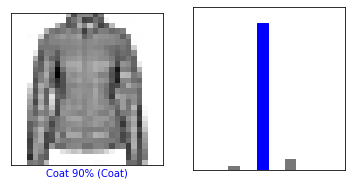

In [21]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

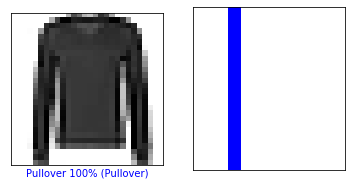

In [22]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

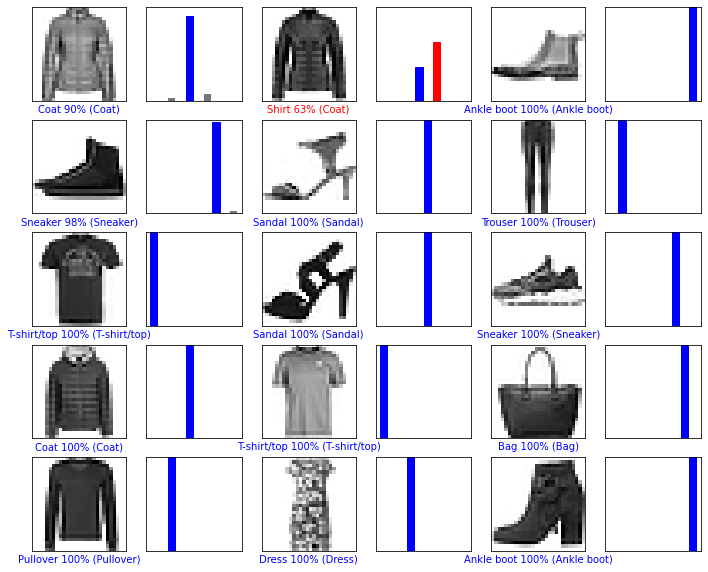

In [23]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [24]:
img = test_images[0]
#toplulaştırma işlemi
img = np.array([img])
predictions_single = model.predict(img)
np.argmax(predictions_single[0])

4